<a href="https://colab.research.google.com/github/julianavelasquezg/Business-Intelligence/blob/main/Trabajo_Final_Mayda_Molina_y_Juliana_Vel%C3%A1squez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo final Analítica de Negocios - Mayda Molina y Juliana Velásquez**



####**Descripción de la base de datos:**

La base de datos "Sleep Health and Lifestyle" recopila información sobre los hábitos de sueño, el estilo de vida y ciertos indicadores de salud de una muestra de individuos. Su propósito es permitir el análisis de cómo diversos factores como la actividad física, el estrés, la frecuencia cardíaca y los hábitos de sueño se relacionan con la presencia de trastornos del sueño.

Esta base de datos es útil para realizar estudios de clasificación, agrupamiento y pronóstico relacionados con la salud del sueño, y puede aportar información valiosa para la toma de decisiones en áreas como la salud pública, la medicina preventiva y el bienestar laboral.

####**Descripción de las variables analizadas en la base de datos:**


* Person ID: Un identificador único para cada individuo.

* Gender: El género de la persona (Masculino/Femenino).

* Age: La edad de la persona en años.

* Occupation: La ocupación o profesión de la persona.

* Sleep Duration (horas): El número de horas que la persona duerme por día.

* Quality of Sleep (escala: 1-10): Una calificación subjetiva de la calidad del sueño, en una escala de 1 a 10.

* Physical Activity Level (minutos/día): El número de minutos que la persona dedica diariamente a la actividad física.

* Stress Level (escala: 1-10): Una calificación subjetiva del nivel de estrés que experimenta la persona, en una escala de 1 a 10.

* BMI Category: La categoría del Índice de Masa Corporal de la persona (por ejemplo: Bajo peso, Normal, Sobrepeso).

* Blood Pressure (sistólica/diastólica): La presión arterial de la persona, indicada como presión sistólica sobre presión diastólica.

* Heart Rate (latidos por minuto): La frecuencia cardíaca en reposo de la persona, en latidos por minuto.

* Daily Steps: El número de pasos que la persona da por día.

* Sleep Disorder: La presencia o ausencia de un trastorno del sueño en la persona (Ninguno, Insomnio, Apnea del Sueño).

####**Tipos de variables**

**Variables categóricas explicativas:**
  
  * Gender: Masculino o Femenino.
  * Occupation: Profesión u ocupación.
  * BMI Category: Bajo peso, Normal, Sobrepeso.
  * Sleep Disorder: Tipo de trastorno del sueño (Insomnio, Apnea del Sueño o Ninguno).


**Variables numéricas explicativas:**

  * Age: Edad en años.
  * Sleep Duration: Horas de sueño por día.
  * Quality of Sleep: Calidad del sueño (escala de 1 a 10).
  * Physical Activity Level: Minutos de actividad física diaria.
  * Stress Level: Nivel de estrés (escala de 1 a 10).
  * Heart Rate: Frecuencia cardíaca en reposo.
  * Daily Steps: Número de pasos diarios.
  * Blood Pressure: Presión arterial (valor sistólico/diastólico).

# **1. Modelo Naive Bayes**

* Variable objetivo: Sleep Disorder (categoría que queremos predecir).

* Variables predictoras: Sleep Duration, Quality of Sleep, Stress Level, BMI Category, etc.

* Objetivo: Predecir el tipo de trastorno del sueño en función del estilo de vida de la persona.

0. Se procede a cargar las librerías de trabajo

In [ ]:
import numpy as np #Posee funciones matemáticas
import pandas as pd #Comunicación con el excel

1. Cargamos la base de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

nxl = '/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


2. Se seleccionan las variables de interés y las dividimos entre variables de entrada y salida

In [ ]:
XDB=XDB[['Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Age','Sleep Disorder']]

#Variables de entrada y salida
XD=XDB[['Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Age']] #XD -> Variables de entrada
YD=XDB[['Sleep Disorder']] #YD -> Variables de salida (Variable pronóstico)

3. Se procede con la implementación del modelo

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

# Variables de entrada y salida
XD = XDB[['Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Age']]
YD = XDB[['Sleep Disorder']]

# Codificamos la variable de salida
le = LabelEncoder()
YD_encoded = le.fit_transform(YD.values.ravel())

# Mostramos el mapeo entre clases y números
print("Mapeo de categorías de 'Sleep Disorder':")
for i, clase in enumerate(le.classes_):
    print(f"{i} → {clase}")

Mapeo de categorías de 'Sleep Disorder':
0 → Insomnia
1 → Sleep Apnea
2 → nan


In [ ]:
# Entrenamos el modelo
mnb = GaussianNB()
mnb.fit(XD, YD_encoded)

# Información del modelo
u = mnb.theta_
print("La media de las variables de entrada es:\n", u)

var = mnb.var_
print("La varianza de las variables de entrada es:\n", var)

sigma = np.sqrt(var)
print("La desviación estándar es:\n", sigma)

LS = u + sigma
LI = u - sigma
print("Límites superiores:\n", LS)
print("Límites inferiores:\n", LI)


# Evaluamos un solicitante
XDS = [[6.5, 7, 5, 35]]  # Valores de entrada (Sleep Duration, Quality, Stress, Age)
YDP = mnb.predict(XDS)   # Se obtiene la predicción (como número)

# Se obtiene el nombre del trastorno
nombre_trastorno = le.inverse_transform(YDP)

# Mostramos ambos resultados
print("La predicción del solicitante es:")
print(f"Código: {YDP[0]}")
print(f"Trastorno del sueño: {nombre_trastorno[0]}")


La media de las variables de entrada es:
 [[ 6.58961039  6.53246753  5.87012987 43.51948052]
 [ 7.03205128  7.20512821  5.66666667 49.70512821]
 [ 7.35844749  7.62557078  5.11415525 39.03652968]]
La varianza de las variables de entrada es:
 [[ 0.14794408  0.63855632  2.11300395 22.82104916]
 [ 0.93807535  2.67587121  5.37606845 79.79766608]
 [ 0.53384424  0.94656082  2.52121523 60.99409945]]
La desviación estándar es:
 [[0.38463499 0.79909719 1.45361754 4.77713818]
 [0.9685429  1.63580904 2.31863504 8.93295394]
 [0.73064645 0.97291357 1.5878335  7.80987192]]
Límites superiores:
 [[ 6.97424538  7.33156473  7.32374741 48.2966187 ]
 [ 8.00059418  8.84093724  7.98530171 58.63808214]
 [ 8.08909394  8.59848435  6.70198875 46.8464016 ]]
Límites inferiores:
 [[ 6.2049754   5.73337034  4.41651233 38.74234234]
 [ 6.06350838  5.56931917  3.34803163 40.77217427]
 [ 6.62780104  6.6526572   3.52632175 31.22665776]]
La predicción del solicitante es:
Código: 2
Trastorno del sueño: nan


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


4. Evaluamos el modelo

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

# Hacemos el pronóstico para los mismos datos de entrenamiento
YDP2 = mnb.predict(XD)

# Matriz de confusión
cm = confusion_matrix(YD_encoded, YDP2)
print("La matriz de confusión es:\n", cm)

# Convertimos todos los nombres de clase a string, por si hay algún float
target_names = [str(c) for c in le.classes_]

# Reporte de clasificación completo
print("\nReporte de clasificación (por clase):")
print(classification_report(YD_encoded, YDP2, target_names=target_names))

# Métricas generales
exactitud = accuracy_score(YD_encoded, YDP2)
print("Exactitud del modelo:", exactitud)

precision_prom = precision_score(YD_encoded, YDP2, average='macro')
print("Precisión promedio (macro):", precision_prom)

sensibilidad_prom = recall_score(YD_encoded, YDP2, average='macro')
print("Sensibilidad promedio (macro):", sensibilidad_prom)


La matriz de confusión es:
 [[ 65   1  11]
 [ 33  32  13]
 [ 32  12 175]]

Reporte de clasificación (por clase):
              precision    recall  f1-score   support

    Insomnia       0.50      0.84      0.63        77
 Sleep Apnea       0.71      0.41      0.52        78
         nan       0.88      0.80      0.84       219

    accuracy                           0.73       374
   macro avg       0.70      0.68      0.66       374
weighted avg       0.77      0.73      0.73       374

Exactitud del modelo: 0.7272727272727273
Precisión promedio (macro): 0.6968360320119115
Sensibilidad promedio (macro): 0.6844996708010406


#### **Análisis de resultados**

1. Matriz de Confusión

 * La diagonal muestra las predicciones correctas.

 * Ejemplo: De 77 casos de Insomnia reales, 65 se clasificaron correctamente, 1 se clasificó como Sleep Apnea, 11 como nan.

 * Vemos que el modelo tiene problemas para distinguir entre Sleep Apnea e Insomnia (muchos errores entre esas dos clases).

 * La clase "nan" se predice mejor, con 175 aciertos de 219 casos.

2. Reporte de Clasificación por Clase

 * Precisión: De todas las predicciones que hizo el modelo para esa clase, cuántas fueron correctas.

 * Recall (sensibilidad): De todos los casos reales de esa clase, cuántos el modelo identificó correctamente.

 * F1-score: Balance entre precisión y recall (más alto = mejor).


Interpretación:

* Insomnia:
 * Recall alto (0.84): El modelo encuentra la mayoría de los casos reales de Insomnia.

 * Precisión baja (0.50): Muchas veces predice Insomnia cuando no debería (falsos positivos).

* Sleep Apnea:

 * Precisión buena (0.71) pero recall bajo (0.41): Cuando dice Sleep Apnea, suele ser correcto, pero pierde muchos casos reales (falsos negativos).

* nan:
 * Buen desempeño en general, con alta precisión y recall.


3. Métricas Globales
* Exactitud (Accuracy): 72.7%
El porcentaje general de predicciones correctas (en total).
* Promedio macro de precisión: 69.7%
Promedio simple de la precisión por clase (sin considerar desequilibrios de clases).
* Promedio macro de recall: 68.4%
Promedio simple del recall por clase.

4. Conclusiones
* El modelo funciona razonablemente bien para la clase más grande ("nan").

* Tiene dificultad para distinguir Sleep Apnea y Insomnia, especialmente porque el recall para Sleep Apnea es bajo.
* La baja precisión para Insomnia indica que puede estar prediciendo Insomnia en otros casos por error.

# **2. Clustering K-Means**

* Variables de entrada: Solo variables numéricas como Age, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, Daily Steps, Heart Rate, etc.

* Variable de agrupamiento (no se usa directamente): Se espera que el modelo agrupe sin saber las clases previamente (unsupervised learning).

* Objetivo: Detectar grupos de personas con patrones similares en salud del sueño y estilo de vida.

0. Se cargan las librerías de trabajo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mapeo de categorías de 'Sleep Disorder':
0 → Insomnia
1 → None
2 → Sleep Apnea

Centroides de los clusters:
 [[4.25792683e+01 6.89512195e+00 6.91463415e+00 4.10243902e+01
  5.59756098e+00 7.05609756e+01 5.30182927e+03]
 [4.88888889e+01 6.19166667e+00 6.16666667e+00 8.83333333e+01
  7.72222222e+00 7.44444444e+01 1.00000000e+04]
 [4.04252874e+01 7.55000000e+00 7.92528736e+00 7.02413793e+01
  4.70114943e+00 6.89080460e+01 7.58620690e+03]]

Número de personas por cluster:
 [164  36 174]

Porcentaje de personas con Insomnia por cluster:
          Insomnia %
Cluster            
0          0.432927
1          0.027778
2          0.028736

Porcentaje de personas con Sleep Apnea por cluster:
          Sleep Apnea %
Cluster               
0             0.097561
1             0.805556
2             0.189655

Porcentaje de personas sin trastorno del sueño por cluster:
            None %
Cluster          
0        0.469512
1        0.166667
2        0.781609


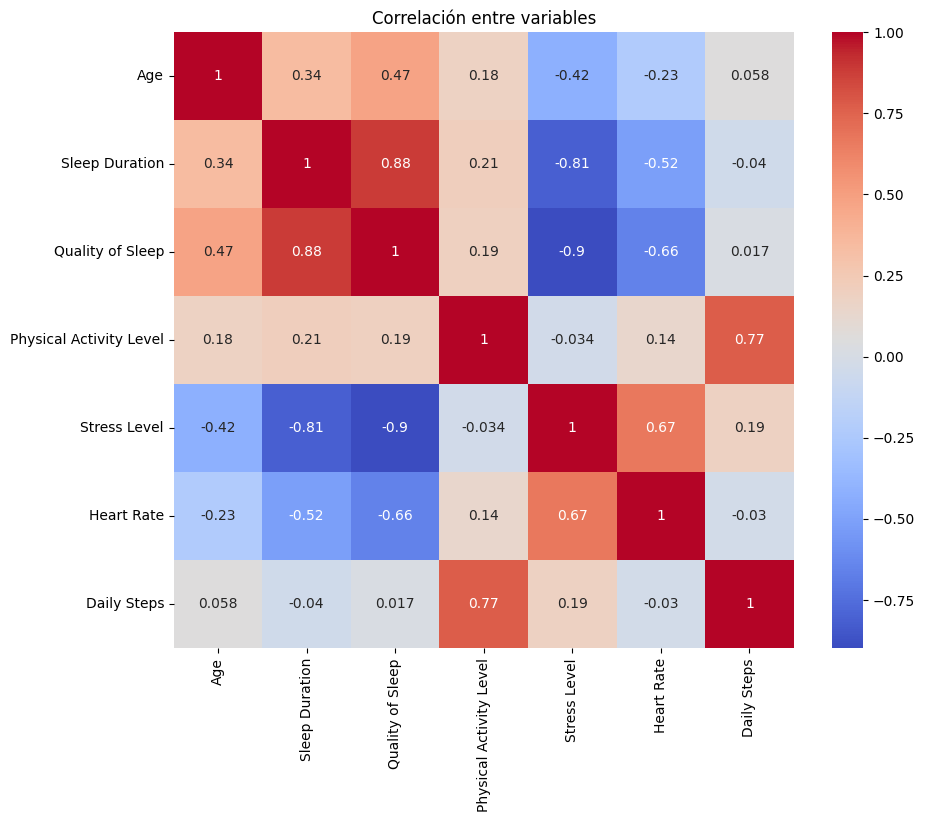

Matriz de confusión:
 [[ 71   5   1]
 [ 77 136   6]
 [ 16  33  29]]

Reporte de clasificación:
              precision    recall  f1-score   support

    Insomnia       0.43      0.92      0.59        77
        None       0.78      0.62      0.69       219
 Sleep Apnea       0.81      0.37      0.51        78

    accuracy                           0.63       374
   macro avg       0.67      0.64      0.60       374
weighted avg       0.71      0.63      0.63       374

Exactitud global: 0.6310160427807486


In [40]:
# Leer el archivo
nxl = '/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.xlsx'
df = pd.read_excel(nxl, sheet_name='Sleep_health_and_lifestyle_data')

# Reemplazar valores nulos en 'Sleep Disorder' con 'None'
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

# Selección de variables relevantes
XDB = df[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
          'Stress Level', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']]

# Eliminar filas con valores nulos en variables numéricas
XDB = XDB.dropna(subset=['Age', 'Sleep Duration', 'Quality of Sleep',
                         'Physical Activity Level', 'Stress Level',
                         'Heart Rate', 'Daily Steps'])

# Separar variables predictoras y objetivo
XD = XDB[['Age', 'Sleep Duration', 'Quality of Sleep',
          'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']]
YD = XDB[['Sleep Disorder']]

# Codificar variable de salida
le = LabelEncoder()
YD_encoded = le.fit_transform(YD.values.ravel())

# Mostrar mapeo de clases
print("Mapeo de categorías de 'Sleep Disorder':")
for i, clase in enumerate(le.classes_):
    print(f"{i} → {clase}")

# Crear modelo KMeans
np.random.seed(42)
nc = 3  # número de clusters
mkm = KMeans(n_clusters=nc, random_state=42, n_init=10)
mkm.fit(XD)

# Centroides
centroids = mkm.cluster_centers_
print("\nCentroides de los clusters:\n", centroids)

# Etiquetas de cluster para cada muestra
labels = mkm.labels_
XDB['Cluster'] = labels

# Conteo de personas por cluster
ND = np.bincount(labels)
print("\nNúmero de personas por cluster:\n", ND)

# Conteo de tipos de trastorno por cluster
NApr = XDB.groupby('Cluster').agg({"Sleep Disorder": lambda x: (x == 'Insomnia').sum()})
NNeg = XDB.groupby('Cluster').agg({"Sleep Disorder": lambda x: (x == 'Sleep Apnea').sum()})
NNone = XDB.groupby('Cluster').agg({"Sleep Disorder": lambda x: (x == 'None').sum()})

# Porcentajes
NApr['Insomnia %'] = NApr['Sleep Disorder'] / ND
NNeg['Sleep Apnea %'] = NNeg['Sleep Disorder'] / ND
NNone['None %'] = NNone['Sleep Disorder'] / ND

print("\nPorcentaje de personas con Insomnia por cluster:\n", NApr[['Insomnia %']])
print("\nPorcentaje de personas con Sleep Apnea por cluster:\n", NNeg[['Sleep Apnea %']])
print("\nPorcentaje de personas sin trastorno del sueño por cluster:\n", NNone[['None %']])

# Visualización opcional (heatmap de correlación)
plt.figure(figsize=(10, 8))
sns.heatmap(XD.corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre variables")
plt.show()

# -- CORRECCIÓN: asignar manualmente la clase dominante a cada cluster --
# Según porcentajes:
# Cluster 0 -> Insomnia (clase 0)
# Cluster 1 -> Sleep Apnea (clase 2)
# Cluster 2 -> None (clase 1)

cluster_to_class = {0: 0, 1: 2, 2: 1}

# Predecir clase para cada muestra según su cluster
ydp = np.zeros(len(XD), dtype=int)
for k in range(len(XD)):
    cluster = labels[k]
    ydp[k] = cluster_to_class[cluster]

# Evaluar desempeño
cm = confusion_matrix(YD_encoded, ydp)
print("Matriz de confusión:\n", cm)

print("\nReporte de clasificación:")
print(classification_report(YD_encoded, ydp, target_names=le.classes_))

print("Exactitud global:", accuracy_score(YD_encoded, ydp))


# **Análisis de resultados**

Para la clasificación de los trastornos del sueño mediante el método de clusterización KMeans, se utilizaron como variables de entrada siete características relacionadas con el estado y hábitos de sueño (edad, duración del sueño, calidad del sueño, nivel de actividad física, nivel de estrés, ritmo cardíaco y pasos diarios). Se definieron tres clusters con el fin de asociar cada grupo a las categorías cualitativas de trastornos del sueño: Insomnia, None (sin trastorno) y Sleep Apnea.

El análisis mostró que el cluster 1 agrupó mayoritariamente a personas con Sleep Apnea (80.6%), mientras que el cluster 2 correspondió principalmente a individuos sin trastorno (78.2%), y el cluster 0 tuvo una mezcla entre personas con Insomnia (43.3%) y sin trastorno (47.0%). La exactitud global del modelo fue del 63.1%, indicando un comportamiento moderado en la clasificación general. En términos de sensibilidad, el modelo destacó en la detección de Insomnia con un 92%, aunque con una precisión baja (43%), lo que implica que detecta casi todos los casos reales, pero incluye falsos positivos. Para la categoría None, el modelo mostró un equilibrio razonable entre precisión (78%) y sensibilidad (62%), mientras que para Sleep Apnea la sensibilidad fue baja (37%) a pesar de una buena precisión (81%), reflejando dificultades para identificar correctamente esta condición.

Estos resultados sugieren que, si bien el modelo es adecuado para distinguir algunos trastornos, especialmente Insomnia, es necesario mejorar su capacidad para clasificar Sleep Apnea y reducir confusiones entre categorías.

#**Análisis detallado:**

**1. Análisis de los centroides de los clusters**
* Cluster 0: Edad promedio (42.6 años), duración de sueño (6.9h), calidad sueño (6.9), actividad física baja (41), estrés medio (5.6), ritmo cardíaco (71 bpm), pasos diarios (5300).
* Cluster 1: Edad más alta (48.9), menor duración y calidad de sueño (6.2 y 6.1), muy alta actividad física (88), estrés alto (7.7), ritmo cardíaco similar (74), pasos máximos (10.000).
* Cluster 2: Edad media (40.4), mejor duración y calidad de sueño (7.55 y 7.93), actividad física moderada (70), bajo estrés (4.7), ritmo cardíaco más bajo (69), pasos (7500).

Interpretación rápida:

Cluster 1 tiene actividad física y estrés altos, y parece agrupar a quienes tienen Sleep Apnea (como veremos abajo).
Cluster 2 tiene mejor calidad y duración del sueño, parece mayormente personas sin trastornos (None).
Cluster 0 tiene valores intermedios, con un % alto de Insomnia.

**2. Distribución de clases por cluster**

* Cluster 1 está claramente dominado por Sleep Apnea (80.6%).
* Cluster 2 está dominado por personas sin trastorno (None) (78.2%).
* Cluster 0 tiene una mezcla, pero la mayoría es Insomnia (43.3%) o None (47%).

**3. Matriz de confusión**

El modelo clasifica bien a los Insomnia (71 de 77 correctamente) → alta sensibilidad (recall 0.92).
Los None (sin trastorno) están menos bien clasificados, 136/219 correctos, con muchas confusiones hacia Insomnia (77 casos).
Los Sleep Apnea se confunden mucho, solo 29/78 correctos (recall 0.37), y muchos etiquetados como None (33) o Insomnia (16).

**4. Reporte de clasificación**

* Precisión: Mide cuántas predicciones positivas fueron correctas. Sleep Apnea y None tienen buena precisión (>0.75), pero Insomnia baja (0.43) — porque muchos casos predichos como Insomnia no lo son.
* Recall (sensibilidad): Mide cuántos casos reales fueron correctamente identificados. Insomnia destaca (0.92), Sleep Apnea baja (0.37), None moderado (0.62).
* F1-score: Balance entre precisión y recall. None tiene el mejor balance, Insomnia y Sleep Apnea peor.

**5. Exactitud global: 63.1%**

Esto indica que el modelo clasifica correctamente un 63% del total de casos.
